In [1]:
from qiskit.circuit import QuantumCircuit
#from qiskit.circuit.library import IQP
from matplotlib import pyplot as plt
from qiskit import QuantumCircuit, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np
from qiskit.circuit import Parameter, ParameterVector

In [2]:
m = 'mpl'
qc = IQP([[1,2,3],
          [2,1,2],
          [3,2,1]])
qc.decompose().draw(m)

NameError: name 'IQP' is not defined

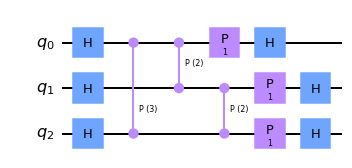

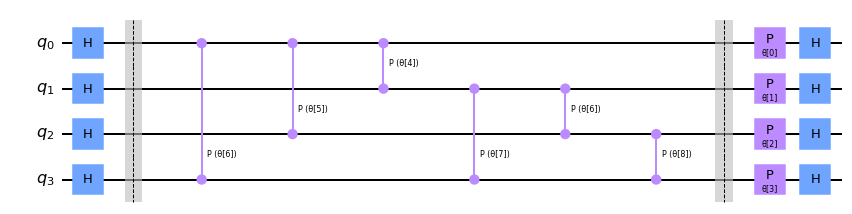

In [6]:
def IQP_Mat(int_mat, insert_barrier=False):
    n = len(int_mat[0][:])
    
    for i in range(n):
        for j in range(n-1, i, -1):
            if(int_mat[i][j] != int_mat[j][i]):
                print("Not a symmetrical interaction matrix!")
                return
    
    qc = QuantumCircuit(n)
    qc.h(range(n))
    
    if(insert_barrier):
        qc.barrier()
    
    for i in range(n):
        for j in range(n-1, i, -1):
            x = int_mat[i][j]
            qc.cp(x, i, j)
    if(insert_barrier):
        qc.barrier()
    
    for i in range(n):
        qc.p(int_mat[i][i], i)
        
    qc.h(range(n))
 
    return qc
qc = IQP_Mat([[1,2,3],
              [2,1,2],
              [3,2,1]])
display(qc.draw(m))

def IQP(n, insert_barrier=False):
    num_params = np.sum([i for i in range(n+1)])
    params = ParameterVector('θ', num_params)
    paramMat = np.empty([n,n], dtype=Parameter)
    for i in range(n):
        paramMat[i][i] = params[i]
        for j in range(n):
            if(i != j):
                paramMat[i][j] = params[n-1+i+j]
                paramMat[j][i] = paramMat[i][j]
    
    return IQP_Mat(paramMat, insert_barrier=insert_barrier)

qc = IQP(4, True)
qc.draw(m)